# Lending Club Case Study

Importing necessary libraries for this case study on Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the only data(csv) file for the case study and displaying forst 5 crows

In [2]:
loan_df = pd.read_csv('loan.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(loan_df.head())

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Get the number of rows and columns in this csv file (39717 rows and 111 columns)

In [3]:
loan_df.shape

(39717, 111)

Removing the applicants whose loan status is current as we cannot absolutely determine if they are going to default or not and this might cause uncertainty in the result set.

In [4]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [5]:
loan_df = loan_df[loan_df.loan_status != 'Current']

Check the number of rows and columns in this csv file after removal of current applicants (38577 rows and 111 columns)

In [6]:
loan_df.shape

(38577, 111)

Removing the columns which are customer behaviour variables. The customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. There are 21 such columns as mentioned below:

delinq_2yrs\
earliest_cr_line\
inq_last_6mths\
open_acc\
pub_rec\
revol_bal\
revol_util\
total_acc\
out_prncp\
out_prncp_inv\
total_pymnt\
total_pymnt_inv\
total_rec_prncp\
total_rec_int\
total_rec_late_fee\
recoveries\
collection_recovery_fee\
last_pymnt_d\
last_pymnt_amnt\
last_credit_pull_d\
application_type

In [7]:
loan_df = loan_df.drop(columns=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'])

Now the number of columns have reduced to 90

In [8]:
loan_df.shape

(38577, 90)

Checking the percentage of nulls in the remaining 90 columns

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(100*(loan_df.isnull().sum()/len(loan_df.index)))

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.472717
purpose                             0.000000
title                               0.028514
zip_code  

Checking for columns having more than 30% nulls. 

In [10]:
columns_missing_val_30_above = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df.index)) > 30 ]
print(columns_missing_val_30_above)
print("Number of columns with more than 30% nulls : ",len(columns_missing_val_30_above))

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

Dropping these columns as out of 58, 57 columns have more than 50% of missing data and only 1 column desc has 32% missing data as these columns cannot be an indicator of defaulters with this high percenatge of missing data.

In [11]:
loan_df = loan_df.drop(columns_missing_val_30_above, axis=1)

Checking the columns post dropping the columns

In [12]:
loan_df.shape

(38577, 32)

Checking for columns which has only one unique value across the rows

In [13]:
single_value_cols = [col for col in loan_df.columns if loan_df[col].nunique() == 1]
print(single_value_cols)
print("Number of columns with just 1 unique value : ",len(single_value_cols))

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']
Number of columns with just 1 unique value :  8


Dropping all the above 8 columns as these cannot be used as an indicator

In [14]:
loan_df = loan_df.drop(columns=single_value_cols)

Checking the shape of the dataframe after dropping the above columns

In [15]:
loan_df.shape

(38577, 24)

Checking for columns with all unique values

In [16]:
unique_cols = []
for col in loan_df.columns:
    if loan_df[col].nunique() == loan_df.shape[0]:
        unique_cols.append(col)

print("Columns with all unique values : ",unique_cols)
print("Number of columns with all unique values : ",len(unique_cols))

Columns with all unique values :  ['id', 'member_id', 'url']
Number of columns with all unique values :  3


Dropping all the above 3 columns as these cannot be used for any indication

In [17]:
loan_df = loan_df.drop(columns=unique_cols)

Checking the shape of the dataframe after dropping the above columns

In [18]:
loan_df.shape

(38577, 21)

Checking for rows with more than 50% nulls

In [19]:
rows_nulls_50 =  loan_df.isnull().sum(axis=1) / len(loan_df.columns) * 100 > 50 
print(loan_df[rows_nulls_50])

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, zip_code, addr_state, dti, pub_rec_bankruptcies]
Index: []

[0 rows x 21 columns]


Checking columns with null values to impute the data with appropriate value

In [20]:
loan_df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2386
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

In [21]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [22]:
loan_df.emp_title

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
5              Veolia Transportaton
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 38577, dtype: object

In [23]:
loan_df.emp_title.value_counts()

US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
Perforex Forest Services                      1
Brevard County Medical Examiner               1
SSPS/State of Washington                      1
Rim of the World Unified School District      1
TV One  LLC                                   1
Name: emp_title, Length: 28027, dtype: int64

As we see that emp_title is neither a categorical nor numerical in nature imputing it with mode/mean/median might not be helpful in correct prediction. Also, deriving the nearest neighbour from the dataset at hand might not result in correct prediction, hence replacing the null values with UNK.

In [24]:
loan_df.loc[loan_df.emp_title.isnull(), 'emp_title'] = 'UNK'

In [25]:
loan_df.emp_title.isnull().sum()

0

We can see below that the number of rows with UNK as emp_title is 2386 which was initially reported as null

In [26]:
loan_df[loan_df.emp_title == 'UNK'].shape[0]

2386

In [27]:
loan_df.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

Emp length is a categorical variable and hence replacing the nulls with mode (10+ years)

In [28]:
loan_df.loc[loan_df.emp_length.isnull(), 'emp_length'] = '10+ years'

In [29]:
loan_df.emp_length.isnull().sum()

0

In [30]:
loan_df[loan_df.emp_length == '10+ years'].shape[0]

9521

In [31]:
loan_df.title.value_counts()

Debt Consolidation                 2090
Debt Consolidation Loan            1620
Personal Loan                       641
Consolidation                       491
debt consolidation                  478
                                   ... 
ATV for x-mas                         1
Jeep Comanche                         1
CC Clean up                           1
Closing out and old credit card       1
Pay grandmother's estate              1
Name: title, Length: 19297, dtype: int64

As we see that title is neither a categorical nor numerical in nature, imputing it with mode/mean/median might not be helpful in correct prediction. Also, deriving the nearest neighbour from the dataset at hand might not result in correct prediction, hence replacing the null values with UNK.

In [32]:
loan_df.loc[loan_df.title.isnull(), 'title'] = 'UNK'

In [33]:
loan_df.title.isnull().sum()

0

In [34]:
loan_df[loan_df.title == 'UNK'].shape[0]

11

In [35]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

pub_rec_bankruptcies is a categorical variable and hence replacing the nulls with mode (0)

In [36]:
loan_df.loc[loan_df.pub_rec_bankruptcies.isnull(), 'pub_rec_bankruptcies'] = 0

In [37]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [38]:
loan_df.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Checking if any columns are still having nulls

In [39]:
loan_df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

Replacing the % in int_rate column as this is a numerical data and converting it to float

In [40]:
loan_df['int_rate'] = loan_df.int_rate.apply(lambda x: float(x.replace('%','')))

In [41]:
loan_df.int_rate.dtype

dtype('float64')

After data cleanup we have the following columns and data type which can be broadly categorized into two types:

| Categorical/Qualitative variables | Numerical/Quantitative variables |
| --- | --- |
| term | funded_amnt |
| grade | loan_amnt |
| sub_grade | funded_amnt_inv |
| emp_length | int_rate |
| home_ownership | annual_inc |
| verification_status | issue_d |
| loan_status | zip_code |
| purpose | dti |
| addr_state | installment |
| pub_rec_bankruptcies |  |



In [42]:
loan_df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

Deriving other meaningful columns from existing columns for EDA

In [43]:
loan_df['int_rate_range'] = pd.cut(loan_df['int_rate'] , bins=[0, 5, 10, 15, 20, 25], labels=['Below 5', '5-10%', '10-15%', '15-20%', '20-25%'])

In [44]:
loan_df.int_rate_range.value_counts()

10-15%     18265
5-10%      12316
15-20%      7226
20-25%       770
Below 5        0
Name: int_rate_range, dtype: int64

In [45]:
loan_df['issue_d_mnth'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.month
loan_df['issue_d_year'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y').dt.year

In [46]:
loan_df.issue_d_year.value_counts()

2011    20516
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

In [47]:
loan_df.issue_d_mnth.value_counts()

12    4215
11    4006
10    3761
9     3498
8     3388
7     3351
6     3180
5     2919
4     2831
3     2691
1     2379
2     2358
Name: issue_d_mnth, dtype: int64

In [48]:
loan_df['annual_inc_range'] = pd.cut(loan_df['annual_inc'], bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000], labels=['Below 10K', '10-20K', '20-30K', '30-40K', '40-50K', '50-60K', '60-70K', '70-80K', '80-90K', '90-100K', '100-110K','110-120K','120-130K', '130-140K','140-150K'])

In [49]:
loan_df.annual_inc_range.value_counts()

40-50K       5691
50-60K       5572
30-40K       5147
60-70K       4096
70-80K       3525
20-30K       3371
80-90K       2510
90-100K      2004
100-110K     1230
110-120K     1098
10-20K       1082
120-130K      731
130-140K      487
140-150K      449
Below 10K      98
Name: annual_inc_range, dtype: int64

In [50]:
loan_df['loan_amnt_range'] = pd.cut(loan_df['loan_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000], labels=['Below 5K', '5-10K', '10-15K', '15-20K', '25K and above'])

In [51]:
loan_df.loan_amnt_range.value_counts()

5-10K            12802
Below 5K          9472
10-15K            7683
15-20K            4349
25K and above     2836
Name: loan_amnt_range, dtype: int64

In [52]:
loan_df['funded_amnt_range'] = pd.cut(loan_df['funded_amnt'], bins=[0, 5000, 10000, 15000, 20000, 25000], labels=['Below 5K', '5-10K', '10-15K', '15-20K', '25K and above'])

In [53]:
loan_df.funded_amnt_range.value_counts()

5-10K            12997
Below 5K          9555
10-15K            7870
15-20K            4340
25K and above     2547
Name: funded_amnt_range, dtype: int64

In [54]:
loan_df['funded_amnt_inv_range'] = pd.cut(loan_df['funded_amnt_inv'], bins=[0, 5000, 10000, 15000, 20000, 25000], labels=['Below 5K', '5-10K', '10-15K', '15-20K', '25K and above'])

In [55]:
loan_df.funded_amnt_inv_range.value_counts()

5-10K            12757
Below 5K         10572
10-15K            7617
15-20K            3984
25K and above     2316
Name: funded_amnt_inv_range, dtype: int64

Columns derived are as follows:
    1.  int_rate_range
    2.  issue_d_mnth
    3.  issue_d_year
    3.  annual_inc_range
    4.  loan_amnt_range
    5.  funded_amnt_range
    6.  funded_amnt_inv_range

In [56]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'int_rate_range', 'issue_d_mnth',
       'issue_d_year', 'annual_inc_range', 'loan_amnt_range',
       'funded_amnt_range', 'funded_amnt_inv_range'],
      dtype='object')

In [57]:
loan_df.shape

(38577, 28)

# Univariate Analysis

Using describe function to understand the numerical data spread across the dataset.

In [58]:
loan_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies,issue_d_mnth,issue_d_year
count,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000
mean,11047.025430,10784.058506,10222.481123,11.932219,322.466318,6.877797e+04,13.272727,0.042694,7.114757,2010.309070
std,7348.441646,7090.306027,7022.720644,3.691327,208.639215,6.421868e+04,6.673044,0.202809,3.408523,0.882658
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,1.000000,2007.000000
25%,5300.000000,5200.000000,5000.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000,4.000000,2010.000000
50%,9600.000000,9550.000000,8733.440000,11.710000,277.860000,5.886800e+04,13.370000,0.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,14000.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000,12.000000,2011.000000


Using boxplot for data visualization of numerical data outliers

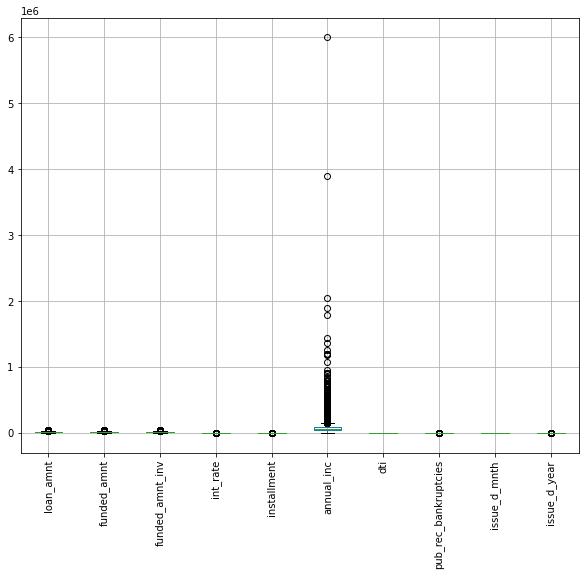

In [59]:
plt.figure(figsize=(10,8))
loan_df.boxplot()
plt.xticks(rotation=90)
plt.show()

As we can see from above boxplot and describe function that annual_inc has outliers which might result in incorrect prediction. Removing the outliers which are above the upper inner fence and below the lower inner fence.

In [60]:
annual_inc_q1 = loan_df['annual_inc'].quantile(q=0.25)
annual_inc_q3 = loan_df['annual_inc'].quantile(q=0.75)
annual_inc_iqr = annual_inc_q3 - annual_inc_q1
annual_inc_lif = annual_inc_q1 - (1.5 * annual_inc_iqr)
annual_inc_uif = annual_inc_q3 + (1.5 * annual_inc_iqr)

loan_df = loan_df.loc[ ~ (( loan_df.annual_inc < annual_inc_lif ) | ( loan_df.annual_inc > annual_inc_uif )) ]

In [61]:
loan_df.shape

(36815, 28)

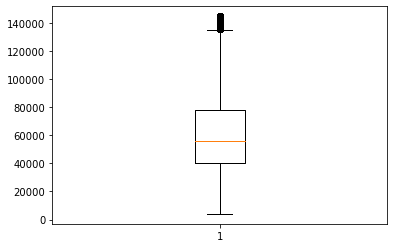

In [62]:
plt.boxplot(loan_df.annual_inc)
plt.show()

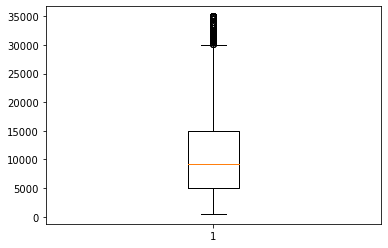

In [63]:
plt.boxplot(loan_df.loan_amnt)
plt.show()

As we can see from above boxplot and describe function that loan_amnt has outliers which might result in incorrect prediction. Removing the outliers which are above the upper inner fence and below the lower inner fence.

In [64]:
loan_amnt_q1 = loan_df['loan_amnt'].quantile(q=0.25)
loan_amnt_q3 = loan_df['loan_amnt'].quantile(q=0.75)
loan_amnt_iqr = loan_amnt_q3 - loan_amnt_q1
loan_amnt_lif = loan_amnt_q1 - (1.5 * loan_amnt_iqr)
loan_amnt_uif = loan_amnt_q3 + (1.5 * loan_amnt_iqr)

loan_df = loan_df.loc[ ~ (( loan_df.loan_amnt < loan_amnt_lif ) | ( loan_df.loan_amnt > loan_amnt_uif )) ]

In [65]:
loan_df.shape

(36265, 28)

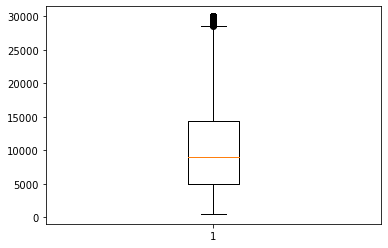

In [66]:
plt.boxplot(loan_df.loan_amnt)
plt.show()

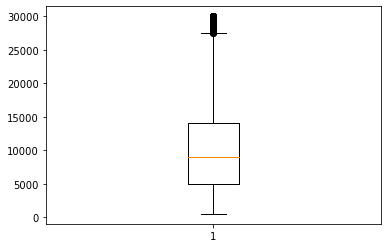

In [67]:
plt.boxplot(loan_df.funded_amnt)
plt.show()

As we can see from above boxplot and describe function that funded_amnt has outliers which might result in incorrect prediction. Removing the outliers which are above the upper inner fence and below the lower inner fence.

In [68]:
funded_amnt_q1 = loan_df['funded_amnt'].quantile(q=0.25)
funded_amnt_q3 = loan_df['funded_amnt'].quantile(q=0.75)
funded_amnt_iqr = funded_amnt_q3 - funded_amnt_q1
funded_amnt_lif = funded_amnt_q1 - (1.5 * funded_amnt_iqr)
funded_amnt_uif = funded_amnt_q3 + (1.5 * funded_amnt_iqr)

loan_df = loan_df.loc[ ~ (( loan_df.funded_amnt < funded_amnt_lif ) | ( loan_df.funded_amnt > funded_amnt_uif )) ]

In [69]:
loan_df.shape

(35875, 28)

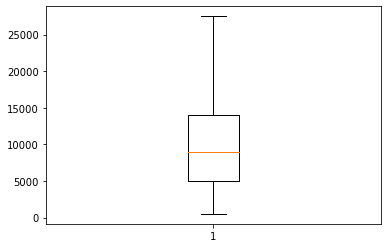

In [70]:
plt.boxplot(loan_df.funded_amnt)
plt.show()

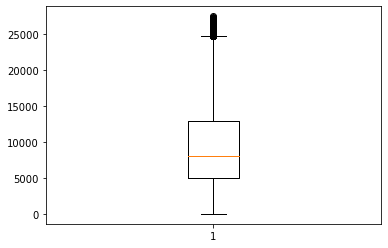

In [71]:
plt.boxplot(loan_df.funded_amnt_inv)
plt.show()

As we can see from above boxplot and describe function that funded_amnt_inv has outliers which might result in incorrect prediction. Removing the outliers which are above the upper inner fence and below the lower inner fence.

In [72]:
funded_amnt_inv_q1 = loan_df['funded_amnt_inv'].quantile(q=0.25)
funded_amnt_inv_q3 = loan_df['funded_amnt_inv'].quantile(q=0.75)
funded_amnt_inv_iqr = funded_amnt_inv_q3 - funded_amnt_inv_q1
funded_amnt_inv_lif = funded_amnt_inv_q1 - (1.5 * funded_amnt_inv_iqr)
funded_amnt_inv_uif = funded_amnt_inv_q3 + (1.5 * funded_amnt_inv_iqr)

loan_df = loan_df.loc[ ~ (( loan_df.funded_amnt_inv < funded_amnt_inv_lif ) | ( loan_df.funded_amnt_inv > funded_amnt_inv_uif )) ]

In [73]:
loan_df.shape

(35303, 28)

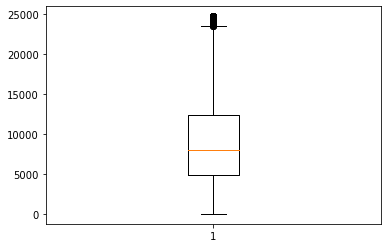

In [74]:
plt.boxplot(loan_df.funded_amnt_inv)
plt.show()

Plotting the loan_status as pie chart to see the percenatge of applicants in each loan_status.

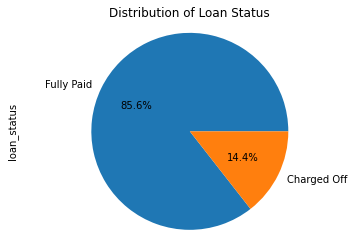

In [75]:
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Loan Status')
plt.show()

Plotting bar chart for term, grade, emp_length, verification_status, home_ownership (categorical variable) as subplots

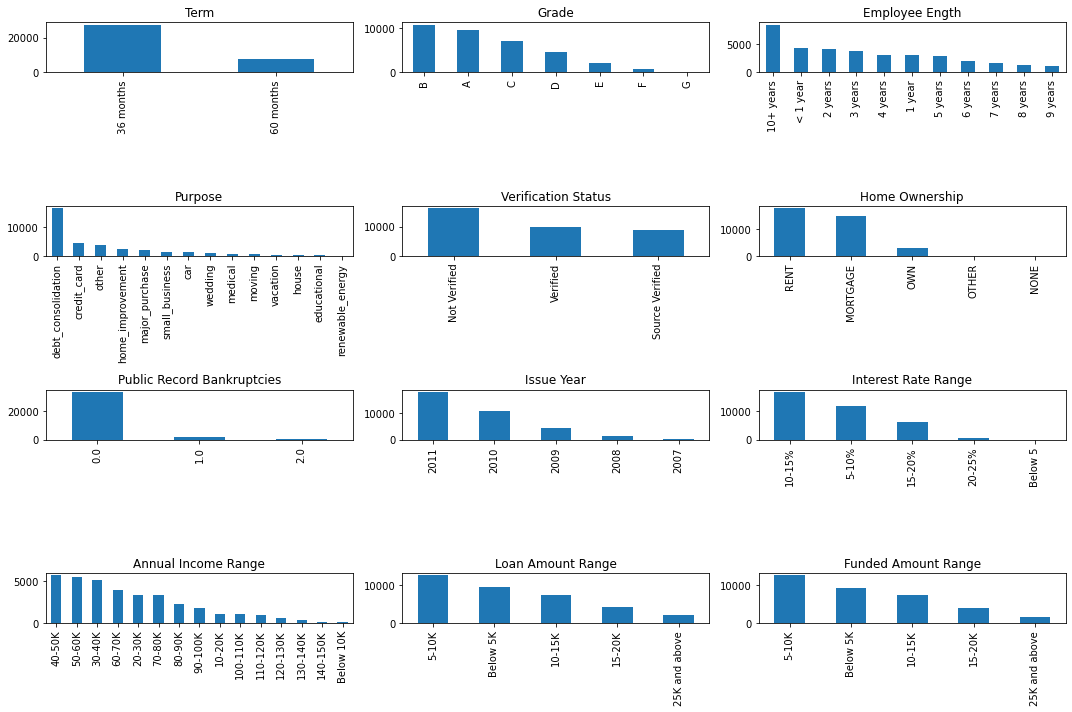

In [76]:
# Create subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

# Plot Term
loan_df['term'].value_counts().plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Term')

# Plot Grade
loan_df['grade'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Grade')

# Plot Employee length
loan_df['emp_length'].value_counts().plot(kind='bar', ax=axs[0, 2])
axs[0, 2].set_title('Employee Ength')

# Plot purpose
loan_df['purpose'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Purpose')

# Plot Marital Status
loan_df['verification_status'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Verification Status')

# Plot Home Ownership
loan_df['home_ownership'].value_counts().plot(kind='bar', ax=axs[1, 2])
axs[1, 2].set_title('Home Ownership')

# Plot pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'].value_counts().plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Public Record Bankruptcies')

# Plot Issue Year
loan_df['issue_d_year'].value_counts().plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_title('Issue Year')

# Plot Interest Rate Range
loan_df['int_rate_range'].value_counts().plot(kind='bar', ax=axs[2, 2])
axs[2, 2].set_title('Interest Rate Range')

# Plot Annual Income Range
loan_df['annual_inc_range'].value_counts().plot(kind='bar', ax=axs[3, 0])
axs[3, 0].set_title('Annual Income Range')

# Plot Loan Amount Range
loan_df['loan_amnt_range'].value_counts().plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Loan Amount Range')

# Plot Funded Amount Range
loan_df['funded_amnt_range'].value_counts().plot(kind='bar', ax=axs[3, 2])
axs[3, 2].set_title('Funded Amount Range')

# Show the plot
plt.tight_layout()
plt.show()


The analysis from above subplots is as follows:
    1.  Most applicants are likely to apply for a loan term of 36 months.
    2.  Applicants of Grade B and A are more likely to apply for loan followed by C, D, E and F. Grade G applicants are least likely to apply for a loan.
    3.  Applicants with more than 10 years of experience and most likely to apply for the loan.
    4.  debt_consolidation is the most frequently used purpose for applying for loans.
    5.  Of all the applications most of the applications are not verified which indicates that most applications source of income was not verified by LC.
    6.  Most applicants with rented or mortgage property apply for loan rather than the one's owning the property.
    7.  Applicants with 0 public record bankruptcies have the maximum number of applications.
    8.  Maximum applications are from the year 2011.
    9.  Maximum applications have been applied with interest rate range 10-15%.
    10. The applicants with annual income range 30K to 60 K mostly apply for loans.
    11. The frequency  of application of loan amount 5-10K is the highest.
    12. The frequency  of application of funded amount 5-10K is the highest.

Plotting bar chart to see the frequency of applications by addr_state

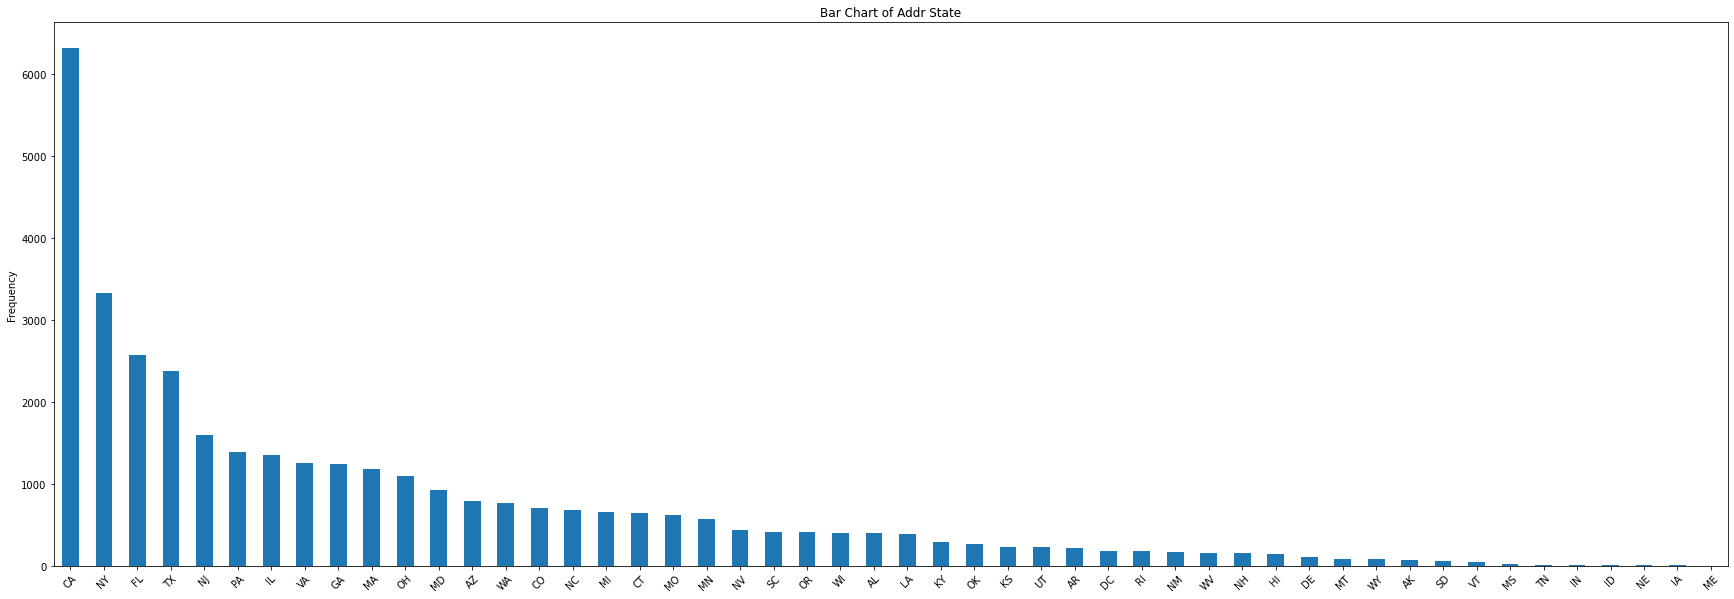

In [77]:
plt.figure(figsize=(30,10))
loan_df.addr_state.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Bar Chart of Addr State')
plt.show()

As per above bar chart we can see clearly that most applications are from the state California

The below chart indicates how the different sub grades of a grade impact the application of loan.

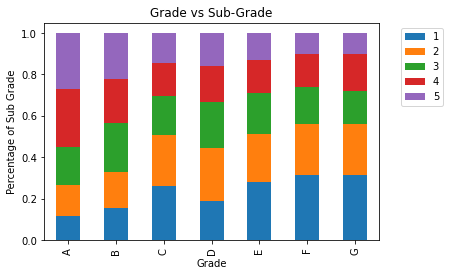

In [78]:
grade_sub_grade_comp = pd.crosstab(loan_df['grade'], loan_df['sub_grade'].str[1:], normalize='index')

# create a stacked bar chart
grade_sub_grade_comp.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Grade vs Sub-Grade')
plt.xlabel('Grade')
plt.ylabel('Percentage of Sub Grade')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# display the plot
plt.show()

# Bivariate Analysis

Below is a bar chart shows the impact of the employee length on loan status.

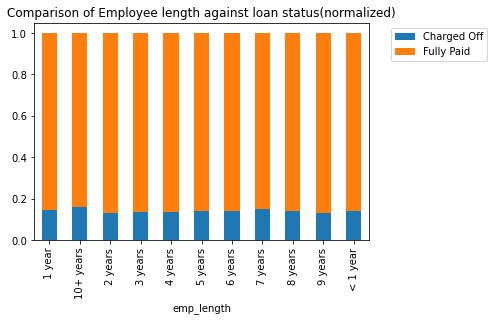

In [79]:
comp_loan_status_emp_length = pd.crosstab(loan_df['emp_length'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_emp_length.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Comparison of Employee length against loan status(normalized)")
plt.show()
# show plot
plt.show()

There is not a significant relation between loan status and employee length

Below is a bar chart shows the impact of the grade on loan status.

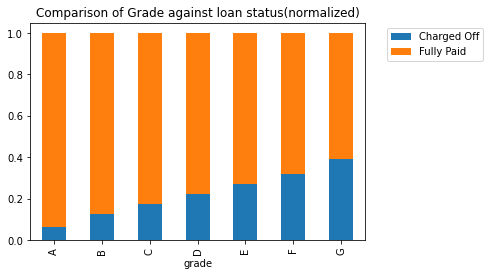

In [80]:
comp_loan_status_grade = pd.crosstab(loan_df['grade'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_grade.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Grade against loan status(normalized)")
plt.show()

The above chart indicates that the percentage of applicants likely to charge off is more for grade G followed by F, E, D, C, B, A

Below is a bar chart shows the impact of the term on loan status.

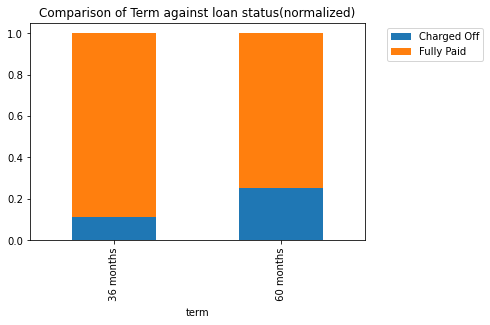

In [81]:
comp_loan_status_term = pd.crosstab(loan_df['term'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_term.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Term against loan status(normalized)")
plt.show()

The above bar chart indicates that when the term or duration of loan is less applicants are less likely to default.

Below is a bar chart shows the impact of the purpose on loan status.

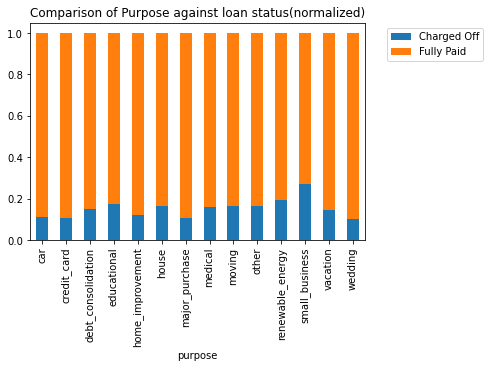

In [82]:
comp_loan_status_purpose = pd.crosstab(loan_df['purpose'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_purpose.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Purpose against loan status(normalized)")
plt.show()

The above bar chart indicates that when the purpose of loan is small business then applicants are most likely to default.

Below is a bar chart shows the impact of the verification status on loan status.

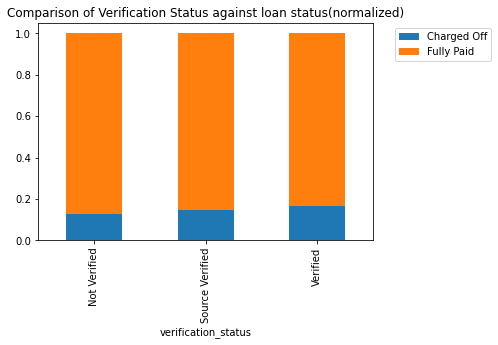

In [83]:
comp_loan_status_verification = pd.crosstab(loan_df['verification_status'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_verification.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Verification Status against loan status(normalized)")
plt.show()

There is not a significant relation between loan status and Verification status

Below is a bar chart shows the impact of state on loan status.

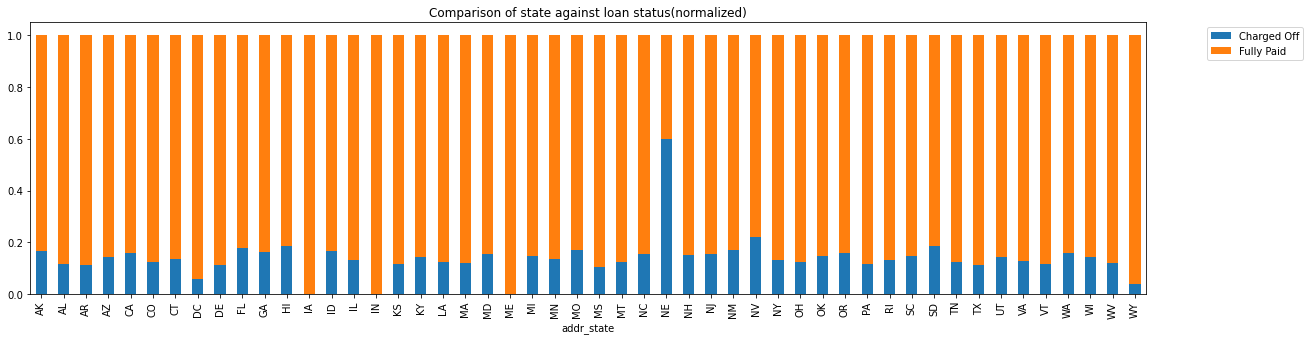

In [84]:
comp_loan_status_state = pd.crosstab(loan_df['addr_state'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
ax = comp_loan_status_state.plot(kind='bar', stacked=True, figsize=(20,5))
# show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Comparison of state against loan status(normalized)")
plt.show()

The above bar chart suggest that most applicants from the state of Nebraska(NE) are most likely to default.

Below is a bar chart shows the impact of home onwership on loan status.

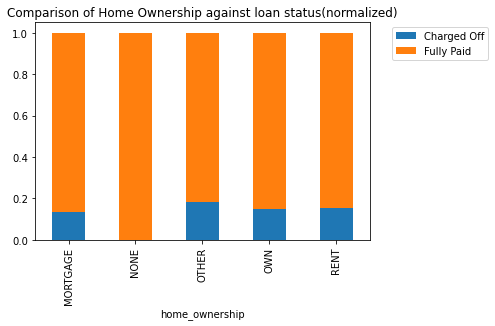

In [85]:
comp_loan_status_home_ownership = pd.crosstab(loan_df['home_ownership'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_home_ownership.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Home Ownership against loan status(normalized)")
plt.show()

The above bar chart specifies that applicants who have ownership of "others" are most likely to default followed by applicants who rent and own house. Applicants who have no home ownershipare least likely to default.

Below is a bar chart shows the impact of public record of bankrupties on loan status.

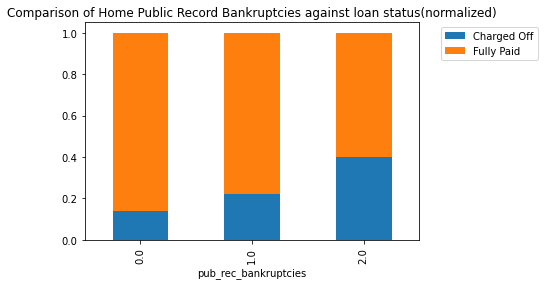

In [86]:
comp_loan_status_pub_rec_bkrpt = pd.crosstab(loan_df['pub_rec_bankruptcies'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_status_pub_rec_bkrpt.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# show plot
plt.title("Comparison of Home Public Record Bankruptcies against loan status(normalized)")
plt.show()

The above bar chart indicates that applicants with 2 bankrupties are more likely to default. There is also a trend that shows that the number of bankruptcies is positively correlated to loans being charged off.

The below plot is to show the distribution of annual income against loan status

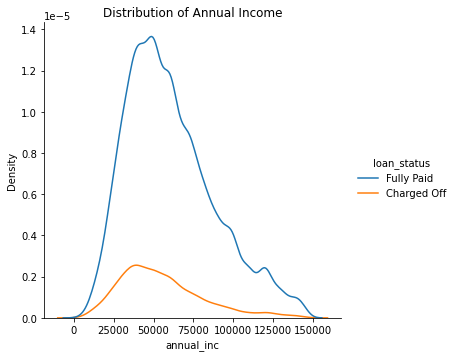

In [87]:
sns.displot(data=loan_df, x="annual_inc", hue="loan_status", kind="kde")
plt.title("Distribution of Annual Income")
plt.show()

The below plot is to show the distribution of loan amount against loan status

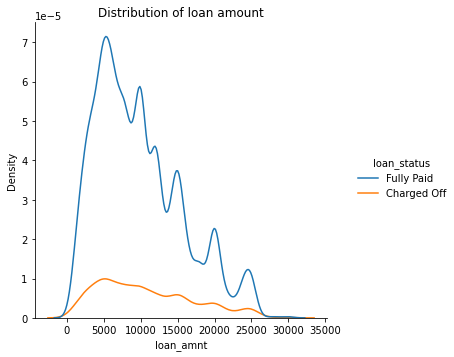

In [88]:
sns.displot(data=loan_df, x="loan_amnt", hue="loan_status", kind="kde")
plt.title("Distribution of loan amount")
plt.show()

The below plot is to show the distribution of funded amount against loan status

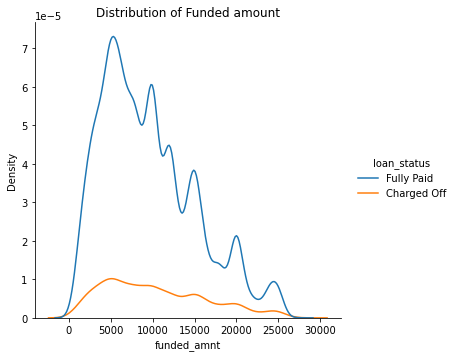

In [89]:
sns.displot(data=loan_df, x="funded_amnt", hue="loan_status", kind="kde")
plt.title("Distribution of Funded amount")
plt.show()

The below plot is to show the distribution of funded amount invested against loan status

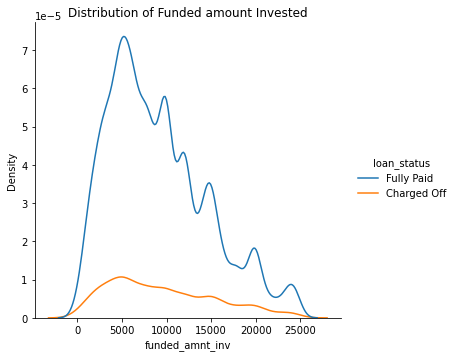

In [90]:
sns.displot(data=loan_df, x="funded_amnt_inv", hue="loan_status", kind="kde")
plt.title("Distribution of Funded amount Invested")
plt.show()

The below plot is to show the distribution of interest rate against loan status

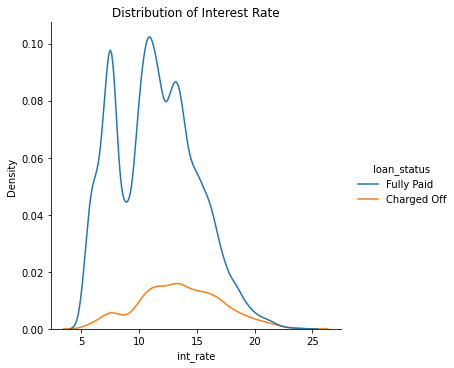

In [91]:
sns.displot(data=loan_df, x="int_rate", hue="loan_status", kind="kde")
plt.title("Distribution of Interest Rate")
plt.show()

# Segmented Bivariate Analysis

The below plot is to show the loan status distribution in loan amount range

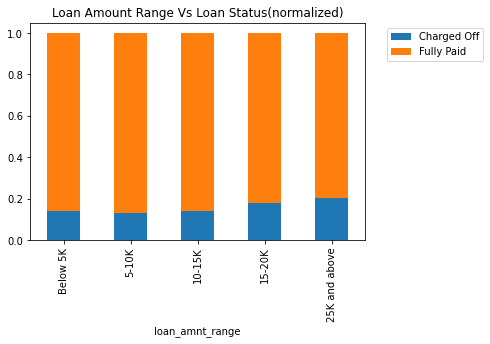

In [92]:
comp_loan_amnt_status = pd.crosstab(loan_df['loan_amnt_range'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_loan_amnt_status.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Loan Amount Range Vs Loan Status(normalized)")
# show plot
plt.show()

The above chart indicates that most charged off loans lie in the range of loan amount which are above 25K.

The below plot is to show the loan status distribution in funded amount range.

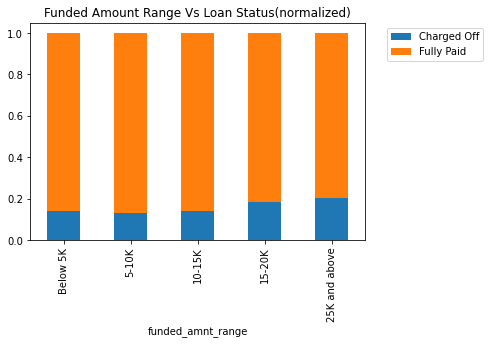

In [93]:
comp_funded_amnt_status = pd.crosstab(loan_df['funded_amnt_range'], loan_df['loan_status'], normalize='index')
comp_funded_amnt_status.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Funded Amount Range Vs Loan Status(normalized)")
plt.show()

The above chart indicates that most charged off loans lie in the range of funded amount which are above 25K.

The below plot is to show the loan status distribution in funded amount invested range.

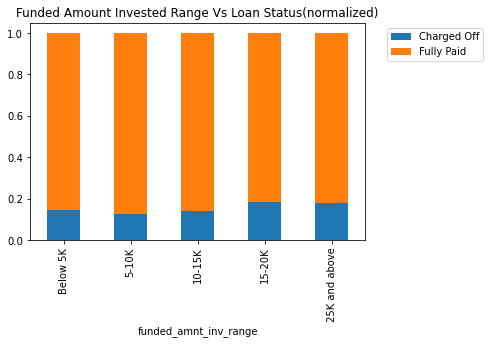

In [94]:
comp_funded_amnt_inv_status = pd.crosstab(loan_df['funded_amnt_inv_range'], loan_df['loan_status'], normalize='index')
comp_funded_amnt_inv_status.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Funded Amount Invested Range Vs Loan Status(normalized)")
plt.show()

The above chart indicates that most charged off loans lie in the range of funded amount invested which are above 25K.

The below plot is to show the loan status distribution in interest rate range.

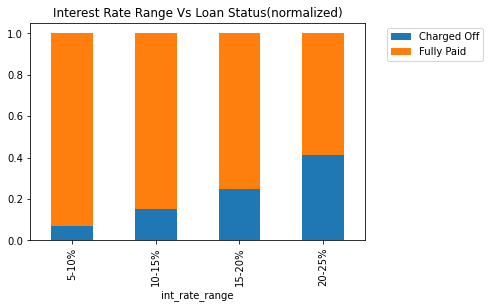

In [95]:
comp_int_rate_range_status = pd.crosstab(loan_df['int_rate_range'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_int_rate_range_status.plot(kind='bar', stacked=True)
# show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Interest Rate Range Vs Loan Status(normalized)")
plt.show()

The above chart indicates that most charged off loans lie in the range of interest which lie between 20-25%.

The below plot is to show the loan status distribution in annual income range.

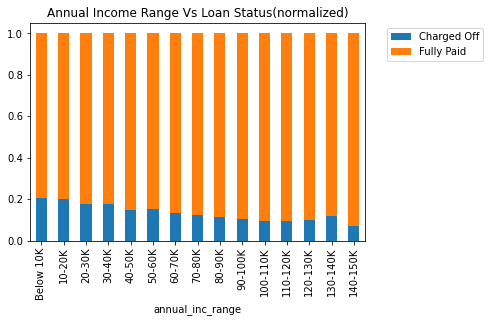

In [96]:
comp_annual_inc_range_status = pd.crosstab(loan_df['annual_inc_range'], loan_df['loan_status'], normalize='index')
# create stacked bar chart
comp_annual_inc_range_status.plot(kind='bar', stacked=True)
# show plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Annual Income Range Vs Loan Status(normalized)")
plt.show()

The above chart indicates that most charged off loans are similar and lie in the range of annual income which are below 10K and 10K-20K.

#  Finding the correlation

The below heatmap shows the corelation of numerical variables for both loan statuses.

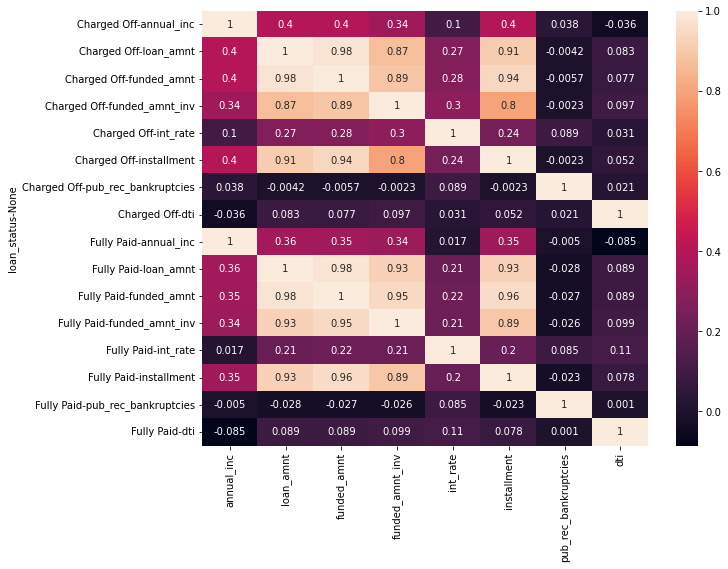

In [97]:
plt.figure(figsize=(10,8))
corr_matrix = loan_df.groupby('loan_status')[['annual_inc', 'loan_amnt', 'funded_amnt','funded_amnt_inv', 'int_rate','installment','pub_rec_bankruptcies','dti']].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

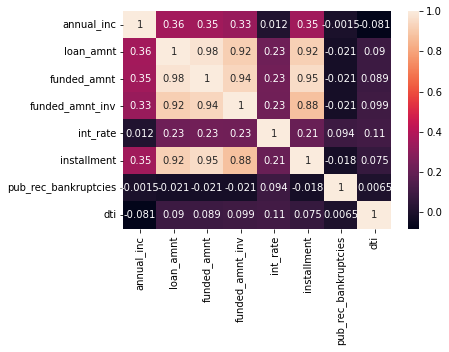

In [98]:
corr_matrix = loan_df[['annual_inc', 'loan_amnt', 'funded_amnt','funded_amnt_inv', 'int_rate','installment','pub_rec_bankruptcies','dti']].corr()

# plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

Plotting pairplot for the significant numerical variables

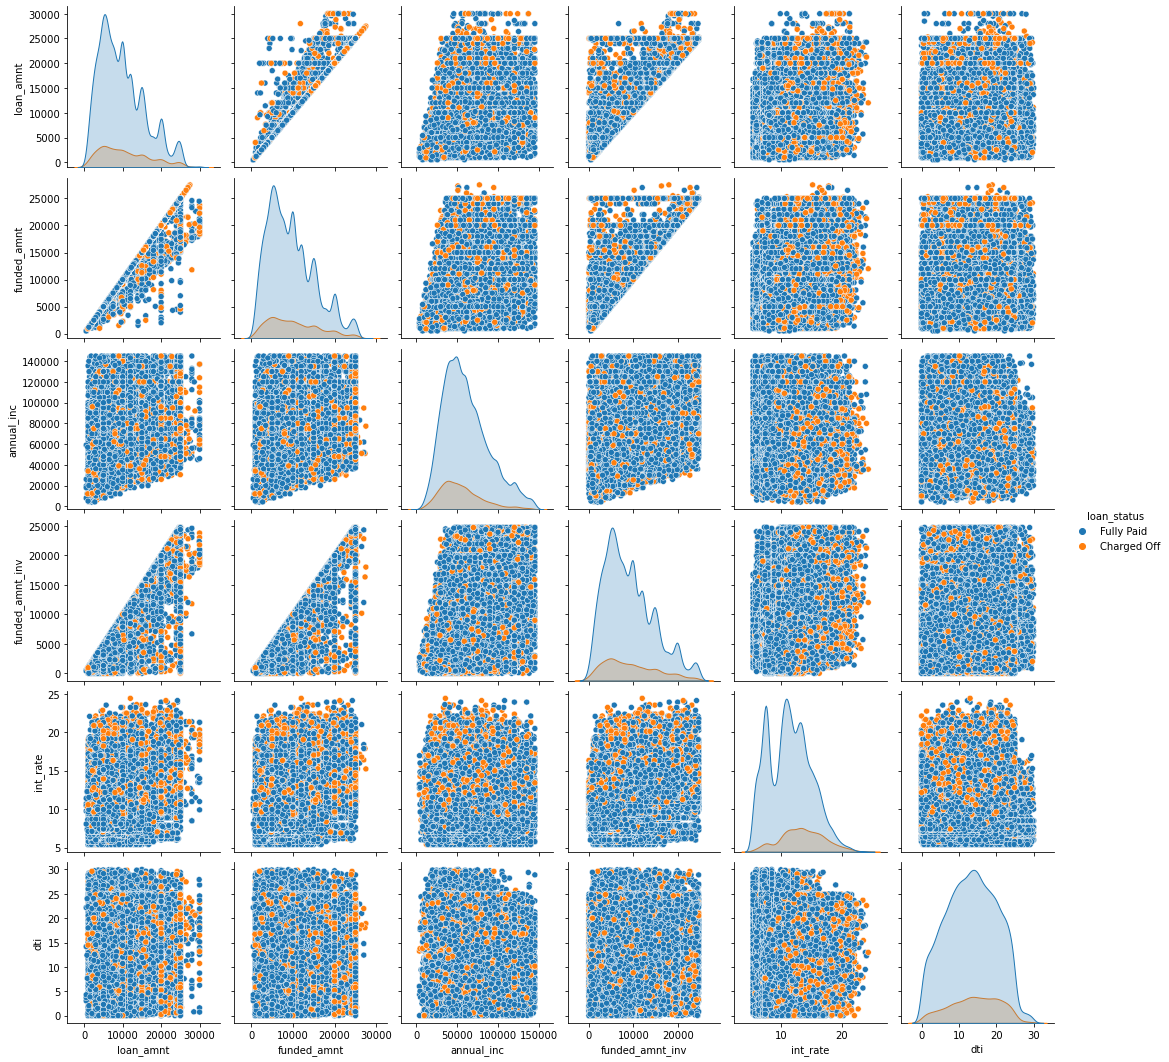

In [99]:
sns.pairplot(loan_df, vars=['loan_amnt', 'funded_amnt', 'annual_inc','funded_amnt_inv','int_rate','dti'], hue="loan_status") 
plt.show()

Below is a pivot table with loan status as index agianst annual income, loan amount, funded amount, funded_amnt_inv, interest rate, installment,public record bankruptcies, dti(debt to income ratio)

In [100]:
pivot_table = loan_df.pivot_table(index='loan_status',values=['annual_inc', 'loan_amnt', 'funded_amnt','funded_amnt_inv', 'int_rate','installment','pub_rec_bankruptcies','dti'],aggfunc='mean')
display(pivot_table)


,annual_inc,dti,funded_amnt,funded_amnt_inv,installment,int_rate,loan_amnt,pub_rec_bankruptcies
loan_status,,,,,,,,
Charged Off,54860.229816,14.064429,10315.046115,9465.486918,298.523662,13.553797,10609.306319,0.069466
Fully Paid,60840.092417,13.283477,9555.964677,9073.416567,290.504280,11.430859,9774.090443,0.040620
